In [27]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [28]:
orders_df = pd.read_csv("orders.csv")
orders_df.sample(5)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
659955,1116396,39759,prior,2,5,15,10.0
180920,2685575,10922,test,4,4,10,30.0
2327895,902858,140156,prior,18,5,14,7.0
1898549,2703998,113993,prior,28,4,9,12.0
950971,2492143,57043,prior,6,0,22,7.0


In [29]:
main_df = pd.read_csv("order_products__prior.csv")
main_df.sample(5)

,order_id,product_id,add_to_cart_order,reordered
28359626,2990791,32741,1,0
4798784,506469,37687,15,0
16523266,1743068,47734,4,0
17247024,1819334,21903,3,1
18175529,1917191,38192,6,1


In [30]:
train_df = pd.read_csv("order_products__train.csv")
train_df.sample(5)

,order_id,product_id,add_to_cart_order,reordered
349957,852470,1244,5,0
188940,463242,42500,4,0
668092,1642423,38275,11,1
1078138,2665092,21137,2,0
1382733,3417483,28985,8,0


In [31]:
prod_df = pd.read_csv("products.csv")
prod_df.sample(5)

,product_id,product_name,aisle_id,department_id
8195,8196,Cherries Apple & Maple Snack Mix,50,19
32617,32618,Toasted Cheddar,107,19
25624,25625,Nonfat Yogurt,36,16
46803,46804,Baking Soda,17,13
9094,9095,Organic Morning Harvest Apples + Walnuts Macrobar,3,19


In [32]:
aisles_df = pd.read_csv("aisles.csv")
aisles_df.sample(5)

,aisle_id,aisle
78,79,frozen pizza
129,130,hot cereal pancake mixes
15,16,fresh herbs
86,87,more household
37,38,frozen meals


In [33]:
dept_df = pd.read_csv("departments.csv")
dept_df.sample(5)

,department_id,department
3,4,produce
18,19,snacks
19,20,deli
10,11,personal care
5,6,international


In [34]:
# Shape of the data
print('The shape of the following datasets:')
print(f'{"Dataset":<20} {"Shape"}')
print(f'{"-"*20} {"-"*10}')
print(f'{"orders":<20} {orders_df.shape}')
print(f'{"order products":<20} {main_df.shape}')
print(f'{"products":<20} {prod_df.shape}')
print(f'{"aisles":<20} {aisles_df.shape}')
print(f'{"departments":<20} {dept_df.shape}')

The shape of the following datasets:
Dataset              Shape
-------------------- ----------
orders               (3421083, 7)
order products       (32434489, 4)
products             (49688, 4)
aisles               (134, 2)
departments          (21, 2)


In [35]:
# Duplicated rows
print("Duplicated rows in each dataset:")
datasets = {
    "orders": orders_df,
    "order products": main_df,
    "products": prod_df,
    "aisles": aisles_df,
    "departments": dept_df
}

for name, df in datasets.items():
    print(f"{name:<20} {df.duplicated().sum()}")

Duplicated rows in each dataset:
orders               0
order products       0
products             0
aisles               0
departments          0


# Outliers

In [36]:
# Summary statistics of orders dataset
orders_df.describe()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.214874e+06
mean,1.710542e+06,1.029782e+05,1.715486e+01,2.776219e+00,1.345202e+01,1.111484e+01
std,9.875817e+05,5.953372e+04,1.773316e+01,2.046829e+00,4.226088e+00,9.206737e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.552715e+05,5.139400e+04,5.000000e+00,1.000000e+00,1.000000e+01,4.000000e+00
50%,1.710542e+06,1.026890e+05,1.100000e+01,3.000000e+00,1.300000e+01,7.000000e+00
75%,2.565812e+06,1.543850e+05,2.300000e+01,5.000000e+00,1.600000e+01,1.500000e+01
max,3.421083e+06,2.062090e+05,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01


In [37]:
# Summary statistics of order products dataset
main_df.describe()

,order_id,product_id,add_to_cart_order,reordered
count,3.243449e+07,3.243449e+07,3.243449e+07,3.243449e+07
mean,1.710749e+06,2.557634e+04,8.351076e+00,5.896975e-01
std,9.873007e+05,1.409669e+04,7.126671e+00,4.918886e-01
min,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,8.559430e+05,1.353000e+04,3.000000e+00,0.000000e+00
50%,1.711048e+06,2.525600e+04,6.000000e+00,1.000000e+00
75%,2.565514e+06,3.793500e+04,1.100000e+01,1.000000e+00
max,3.421083e+06,4.968800e+04,1.450000e+02,1.000000e+00


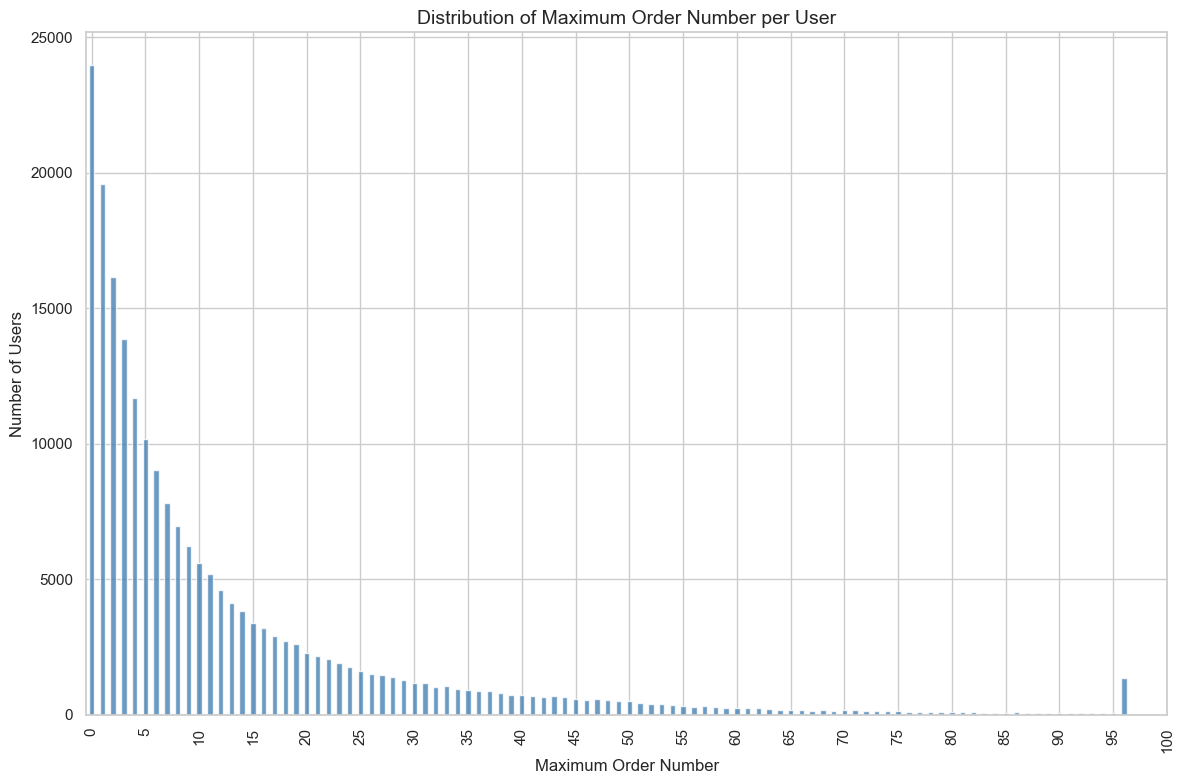

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate and plot the distribution
plt.figure(figsize=(12, 8))
orders_df.groupby("user_id")["order_number"].max().value_counts().sort_index().plot(
    kind='bar', 
    alpha=0.8, 
    color='steelblue'
)

# Customize the plot
plt.title('Distribution of Maximum Order Number per User', fontsize=14)
plt.xlabel('Maximum Order Number', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)
plt.xticks(np.arange(0, 101, 5), np.arange(0, 101, 5))

plt.tight_layout()
plt.show()

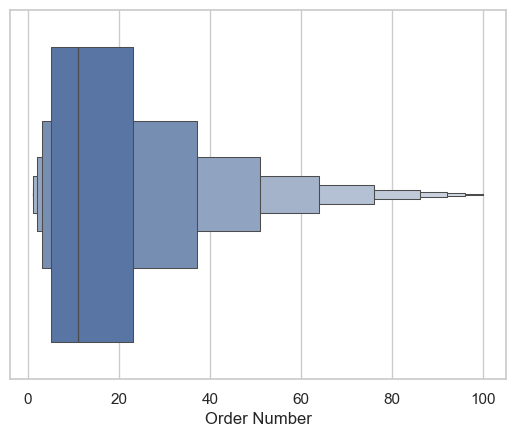

In [39]:
# Visualize boxen plot
sns.set(style = "whitegrid")
ax = sns.boxenplot(x = orders_df['order_number'])
ax.set_xlabel('Order Number')
plt.show()

# Data Transformation

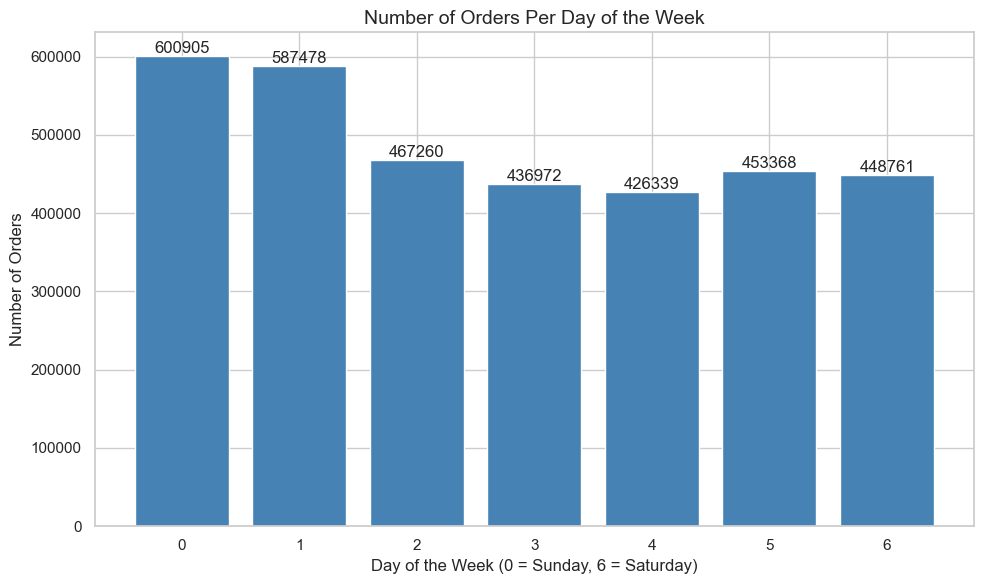

In [40]:
import matplotlib.pyplot as plt

# Group by 'order_dow' and count the number of orders for each day of the week
reordering = orders_df['order_dow'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(reordering.index, reordering.values, color='steelblue')

# Customize the plot
plt.title('Number of Orders Per Day of the Week', fontsize=14)
plt.xlabel('Day of the Week (0 = Sunday, 6 = Saturday)', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)

# Ensure x-axis shows all days
plt.xticks(range(7))

# Add value labels on top of each bar
for i, v in enumerate(reordering.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()

In [41]:
orders_df.groupby('order_dow')['order_id'].count()

order_dow
0    600905
1    587478
2    467260
3    436972
4    426339
5    453368
6    448761
Name: order_id, dtype: int64

In [42]:
# Mapping of day of the week (0-6) to day names (Saturday-Friday)
day_names = {0: 'Saturday', 1: 'Sunday', 2: 'Monday', 3: 'Tuesday', 4: 'Wednesday', 5: 'Thursday', 6: 'Friday'}

# Convert the 'order_dow' column to day names and set custom ordering
orders_df['order_dow'] = orders_df['order_dow'].map(day_names)

In [43]:
# Create a custom order for day names
custom_order = ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

# Categorize 'order_dow' as a categorical data type with the custom order
orders_df['order_dow'] = pd.Categorical(orders_df['order_dow'], categories=custom_order, ordered=True)

# Display the DataFrame with day names in the specified order
result = orders_df.groupby('order_dow')['order_id'].count()
result = result[result.index.isin(custom_order)]  # Sort based on custom order
result

order_dow
Saturday     600905
Sunday       587478
Monday       467260
Tuesday      436972
Wednesday    426339
Thursday     453368
Friday       448761
Name: order_id, dtype: int64

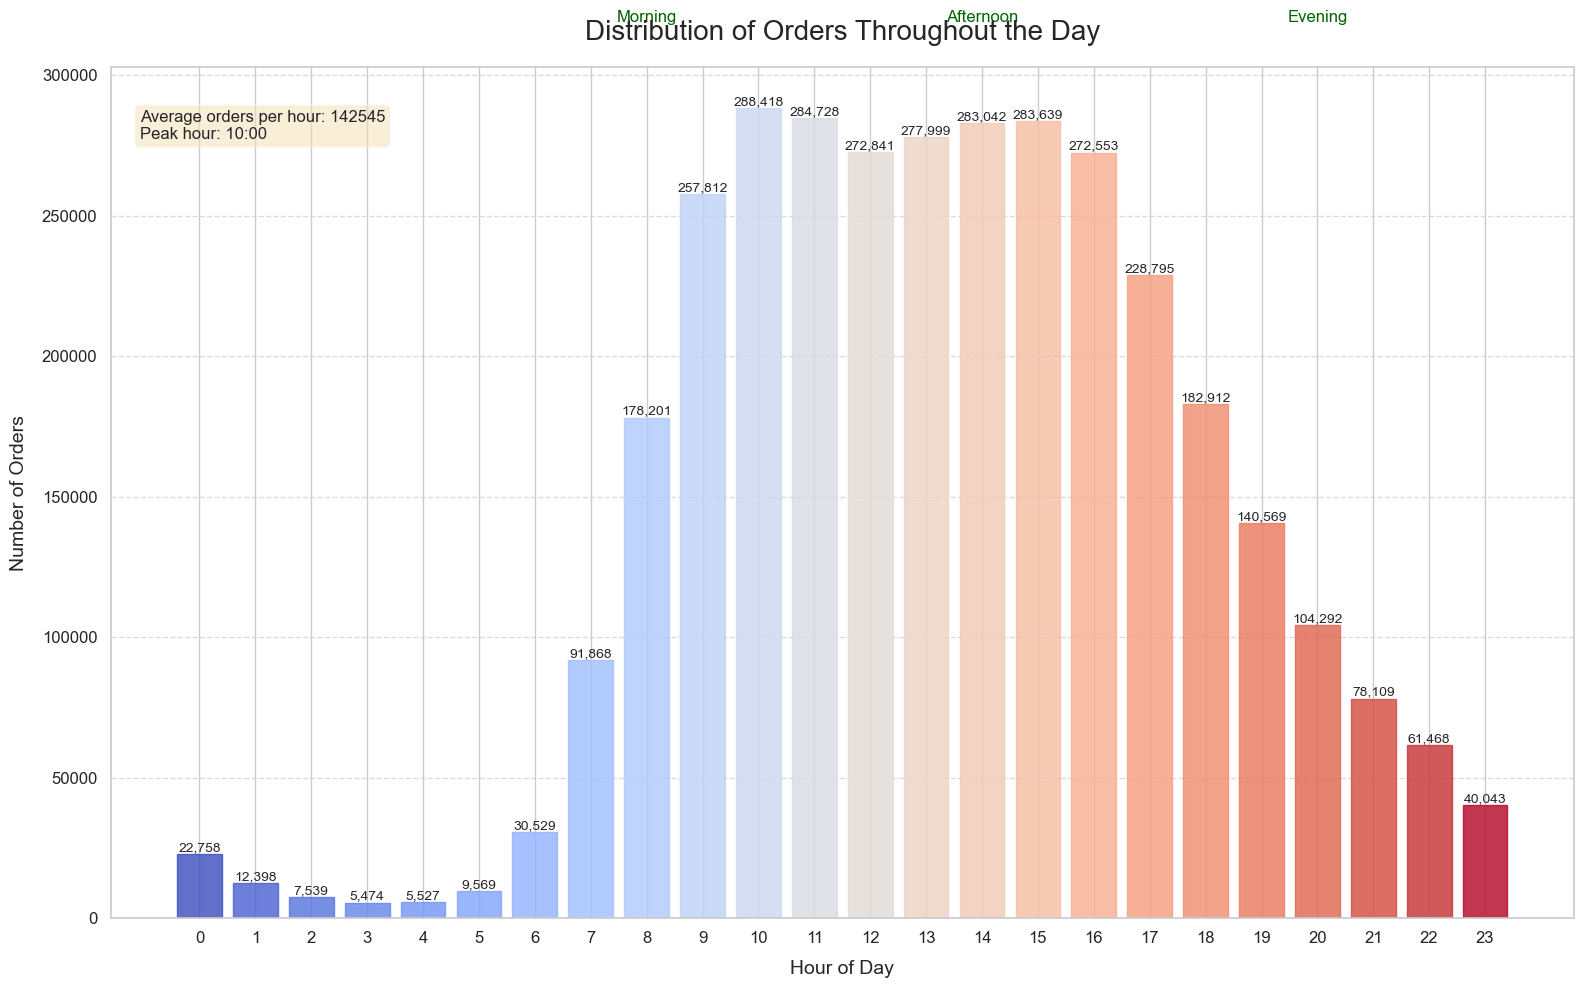

In [45]:

# Group by 'order_hour_of_day' and count the number of orders for each hour of the day
reordering = orders_df['order_hour_of_day'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(16, 10))
bars = plt.bar(reordering.index, reordering.values, color='steelblue', alpha=0.8)

# Customize the plot
plt.title('Distribution of Orders Throughout the Day', fontsize=20, pad=20)
plt.xlabel('Hour of Day', fontsize=14, labelpad=10)
plt.ylabel('Number of Orders', fontsize=14, labelpad=10)

# Set x-axis ticks and labels
plt.xticks(np.arange(0, 24, 1), fontsize=12)
plt.yticks(fontsize=12)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:,}',
             ha='center', va='bottom', fontsize=10)

# Add a color gradient to represent time of day
colors = plt.cm.coolwarm(np.linspace(0, 1, 24))
for bar, color in zip(bars, colors):
    bar.set_color(color)

# Add annotations for time periods
plt.annotate('Morning', xy=(8, plt.ylim()[1]), xytext=(8, plt.ylim()[1]*1.05), 
             ha='center', va='bottom', fontsize=12, color='darkgreen')
plt.annotate('Afternoon', xy=(14, plt.ylim()[1]), xytext=(14, plt.ylim()[1]*1.05), 
             ha='center', va='bottom', fontsize=12, color='darkgreen')
plt.annotate('Evening', xy=(20, plt.ylim()[1]), xytext=(20, plt.ylim()[1]*1.05), 
             ha='center', va='bottom', fontsize=12, color='darkgreen')

# Add some insights
avg_orders = reordering.mean()
peak_hour = reordering.idxmax()
plt.text(0.02, 0.95, f"Average orders per hour: {avg_orders:.0f}\nPeak hour: {peak_hour:02d}:00", 
         transform=plt.gca().transAxes, fontsize=12, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()